In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df_statlog=pd.read_csv('capstone datasets/Heart Disease Statlog/Heart_disease_statlog.csv')

| Column       | Description                                                                                                                 | Example (Row 0) |
| ------------ | --------------------------------------------------------------------------------------------------------------------------- | --------------- |
| **age**      | Age of the patient (in years)                                                                                               | 70              |
| **sex**      | Sex of the patient: `1` = male, `0` = female                                                                                | 1               |
| **cp**       | Chest pain type:<br>• `0` = typical angina<br>• `1` = atypical angina<br>• `2` = non-anginal pain<br>• `3` = asymptomatic   | 3               |
| **trestbps** | Resting blood pressure (in mm Hg)                                                                                           | 130             |
| **chol**     | Serum cholesterol (in mg/dL)                                                                                                | 322             |
| **fbs**      | Fasting blood sugar > 120 mg/dL: `1` = true, `0` = false                                                                    | 0               |
| **restecg**  | Resting electrocardiographic results:<br>• `0` = normal<br>• `1` = ST-T abnormality<br>• `2` = left ventricular hypertrophy | 2               |
| **thalach**  | Maximum heart rate achieved                                                                                                 | 109             |
| **exang**    | Exercise-induced angina: `1` = yes, `0` = no                                                                                | 0               |
| **oldpeak**  | ST depression induced by exercise relative to rest                                                                          | 2.4             |
| **slope**    | Slope of the peak exercise ST segment:<br>• `0` = upsloping<br>• `1` = flat<br>• `2` = downsloping                          | 1               |
| **ca**       | Number of major vessels (0–3) colored by fluoroscopy                                                                        | 3               |
| **thal**     | Thalassemia:<br>• `1` = normal<br>• `2` = fixed defect<br>• `3` = reversible defect                                         | 1               |
| **target**   | Diagnosis of heart disease:<br>• `1` = has heart disease<br>• `0` = no heart disease                                        | 1               |


In [4]:
df_statlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [5]:
df_statlog.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


In [6]:
df_statlog.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [7]:
X=df_statlog.drop(labels='target',axis=1)
y=df_statlog['target']

#### Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Feature scaling

This dataset has only two int columns, Age and Room Number. These two columns do not require any standardization

In [9]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
print(f'standard_features std is {X_train_scaled.std(axis=0)}')
print(f'standard_features mean is {X_train_scaled.mean(axis=0)}')

X_test_scaled=scaler.transform(X_test)
print(f'standard_features std is {X_test_scaled.std(axis=0)}')
print(f'standard_features mean is {X_test_scaled.mean(axis=0)}')

standard_features std is [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
standard_features mean is [ 3.53626593e-16  2.87835599e-17  2.11764762e-16  7.56596432e-16
  1.31581988e-16 -6.57909941e-17  3.49514656e-17  3.96801933e-16
 -8.22387426e-18 -3.28954970e-17 -8.22387426e-18 -7.40148683e-17
 -3.49514656e-17]
standard_features std is [0.97896397 1.07127549 0.87248512 0.99156103 1.02724676 1.18132871
 1.00466848 1.0573535  0.89526742 0.83677485 1.03530409 0.90689267
 0.97401175]
standard_features mean is [-0.18150221 -0.23215748 -0.03335035 -0.11886603 -0.0481027   0.20369082
 -0.07447098  0.13123792 -0.23267002 -0.20293819 -0.09892011 -0.07725233
 -0.15424598]


#### Setting the parameters for KNN

In [10]:
knn_classifier_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2]
}

#### Running cross-validation

In [11]:
knn = KNeighborsClassifier()

# Grid search
grid_search = GridSearchCV(estimator=knn, param_grid=knn_classifier_param_grid, cv=5, n_jobs=-1, scoring='accuracy')


In [12]:
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


y_pred = best_model.predict(X_test)

#Evaluate the model
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Accuracy on test data: 0.7037037037037037
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.62      0.62      0.62        21

    accuracy                           0.70        54
   macro avg       0.69      0.69      0.69        54
weighted avg       0.70      0.70      0.70        54



In [16]:
from sklearn.metrics import confusion_matrix, roc_curve, auc


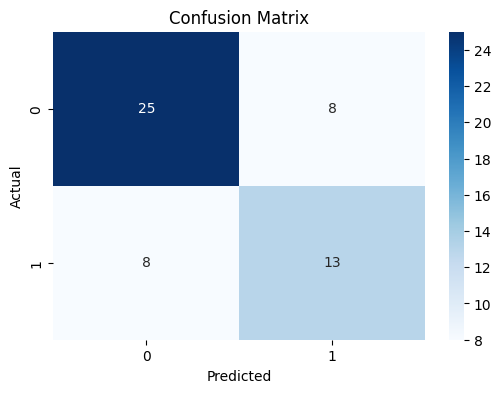

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()